In [ ]:
import pandas as pd
from scipy.stats import pointbiserialr

In [ ]:
file_path = "/content/Feature_Track.xlsx"

df = pd.read_excel(file_path)

In [ ]:
neuro_features = [
    'hr', 'hrv_lf', 'hrv_hf', 'hrv_lfhf_ratio', 'gsr_tonic', 'gsr_phasic',
    'gsr_peaks', 'EBRmean', 'BDmean', 'ThetaFrontal', 'ThetaParietal',
    'AlphaFrontal', 'AlphaParietal', 'LowerAlphaFrontal', 'LowerAlphaParietal',
    'UpperAlphaFrontal', 'UpperAlphaParietal', 'BetaFrontal', 'BetaParietal',
    'LowerBetaFrontal', 'LowerBetaParietal', 'UpperBetaFrontal', 'UpperBetaParietal', 'risk_outcome'
]

neuro_df = df[neuro_features]

In [ ]:
neuro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hr                  711 non-null    float64
 1   hrv_lf              711 non-null    float64
 2   hrv_hf              711 non-null    float64
 3   hrv_lfhf_ratio      711 non-null    float64
 4   gsr_tonic           816 non-null    float64
 5   gsr_phasic          816 non-null    float64
 6   gsr_peaks           816 non-null    float64
 7   EBRmean             717 non-null    float64
 8   BDmean              715 non-null    float64
 9   ThetaFrontal        809 non-null    float64
 10  ThetaParietal       809 non-null    float64
 11  AlphaFrontal        809 non-null    float64
 12  AlphaParietal       809 non-null    float64
 13  LowerAlphaFrontal   809 non-null    float64
 14  LowerAlphaParietal  809 non-null    float64
 15  UpperAlphaFrontal   809 non-null    float64
 16  UpperA

In [ ]:
unique_values = neuro_df['risk_outcome'].unique()

# Print the unique values
print(unique_values)

[2 1]


In [ ]:
neuro_df = neuro_df.dropna()

In [ ]:
neuro_df.loc[:, 'risk_outcome'] = neuro_df['risk_outcome'].apply(lambda x: 1 if x == 2 else 0 if x == 1 else x)

<ipython-input-170-9168b32714b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neuro_df.loc[:, 'risk_outcome'] = neuro_df['risk_outcome'].apply(lambda x: 1 if x == 2 else 0 if x == 1 else x)


In [ ]:
neuro_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 703 entries, 1 to 1051
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hr                  703 non-null    float64
 1   hrv_lf              703 non-null    float64
 2   hrv_hf              703 non-null    float64
 3   hrv_lfhf_ratio      703 non-null    float64
 4   gsr_tonic           703 non-null    float64
 5   gsr_phasic          703 non-null    float64
 6   gsr_peaks           703 non-null    float64
 7   EBRmean             703 non-null    float64
 8   BDmean              703 non-null    float64
 9   ThetaFrontal        703 non-null    float64
 10  ThetaParietal       703 non-null    float64
 11  AlphaFrontal        703 non-null    float64
 12  AlphaParietal       703 non-null    float64
 13  LowerAlphaFrontal   703 non-null    float64
 14  LowerAlphaParietal  703 non-null    float64
 15  UpperAlphaFrontal   703 non-null    float64
 16  UpperAl

In [ ]:
unique_values = neuro_df['risk_outcome'].unique()
print(unique_values)

[1 0]


In [ ]:
correlation = neuro_df.corr()['risk_outcome'].abs().sort_values(ascending=False)

# Print the correlation coefficients
print(correlation)

risk_outcome          1.000000
hr                    0.475861
BDmean                0.185888
UpperAlphaParietal    0.165843
AlphaParietal         0.161629
LowerBetaParietal     0.161297
LowerAlphaParietal    0.152205
ThetaParietal         0.142941
BetaParietal          0.140319
ThetaFrontal          0.118501
UpperBetaParietal     0.109199
hrv_lfhf_ratio        0.093327
gsr_phasic            0.086163
LowerAlphaFrontal     0.083522
AlphaFrontal          0.076030
gsr_peaks             0.071669
UpperAlphaFrontal     0.059804
hrv_hf                0.052454
LowerBetaFrontal      0.031816
gsr_tonic             0.022357
EBRmean               0.019625
UpperBetaFrontal      0.017292
hrv_lf                0.005886
BetaFrontal           0.003937
Name: risk_outcome, dtype: float64


In [ ]:
risky_features = [
    'hr', 'BDmean', 'UpperAlphaParietal'
]

In [ ]:
non_risky_features = [
    'UpperBetaFrontal', 'hrv_lf', 'BetaFrontal'
]

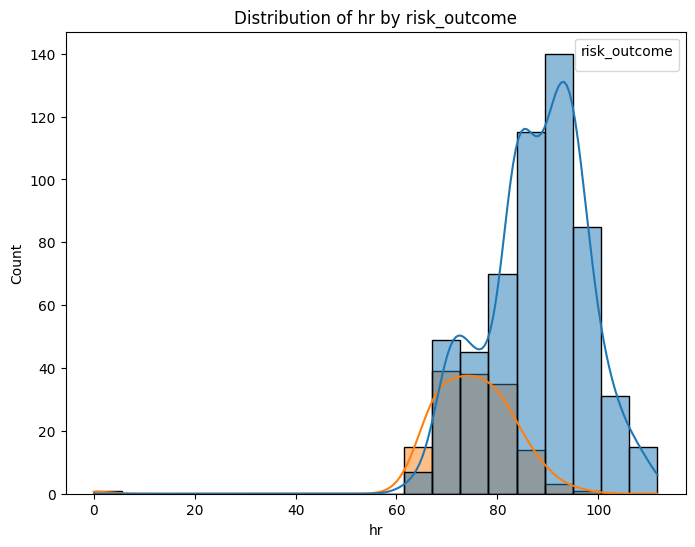

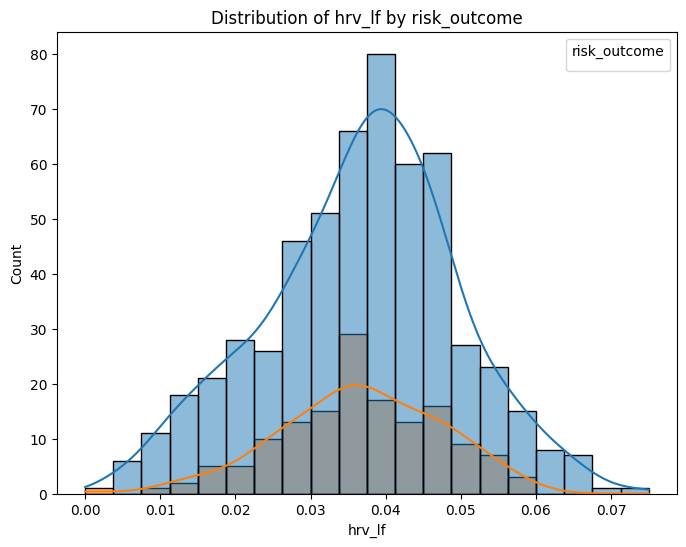

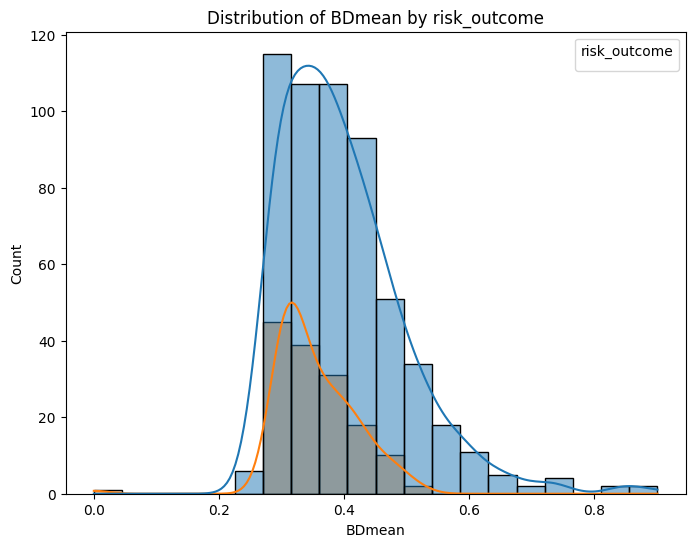

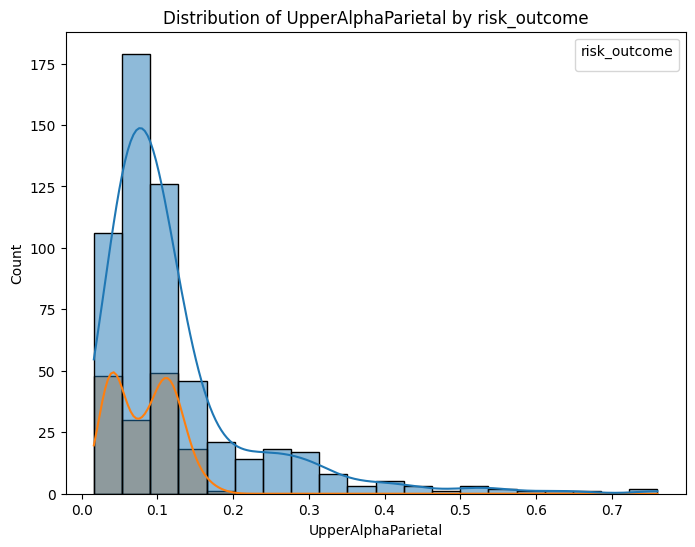

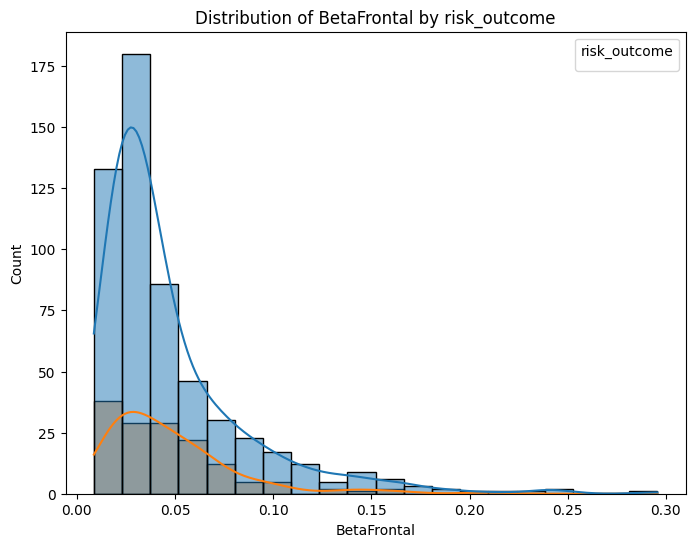

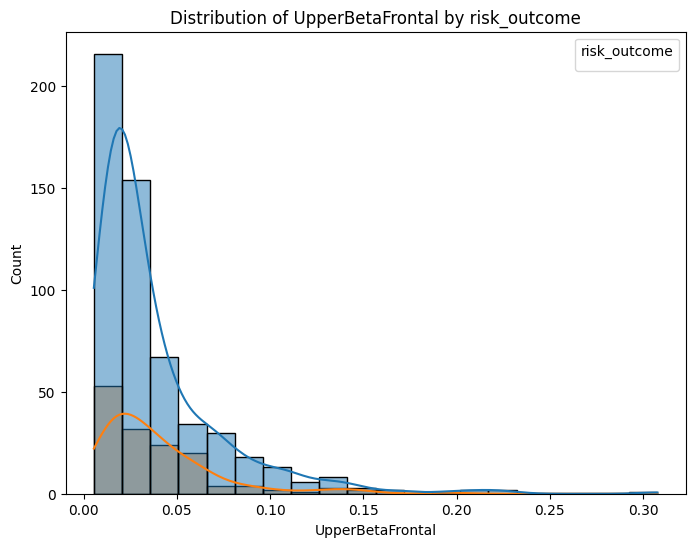

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define features and target variable
features = ['hr', 'hrv_lf', 'BDmean',
            'UpperAlphaParietal', 'BetaFrontal',
            'UpperBetaFrontal']
target_variable = 'risk_outcome'

# Plot histograms or boxplots for each feature grouped by risk_outcome
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=neuro_df, x=feature, hue=target_variable, bins=20, kde=True)
    plt.title(f'Distribution of {feature} by {target_variable}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title=target_variable)
    plt.show()

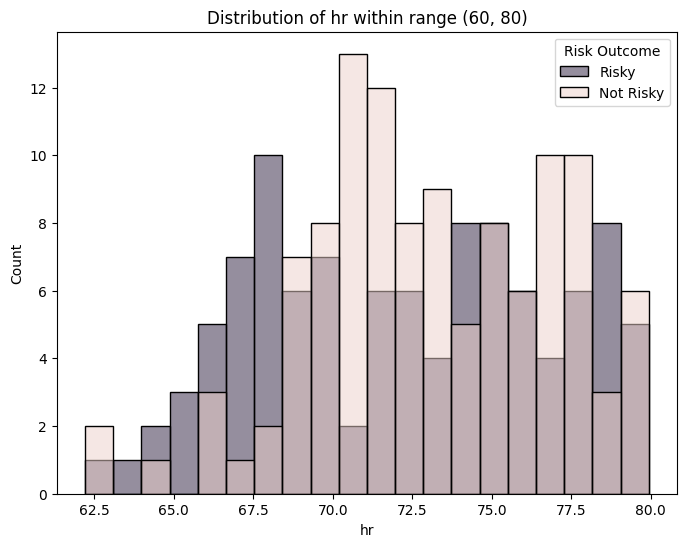

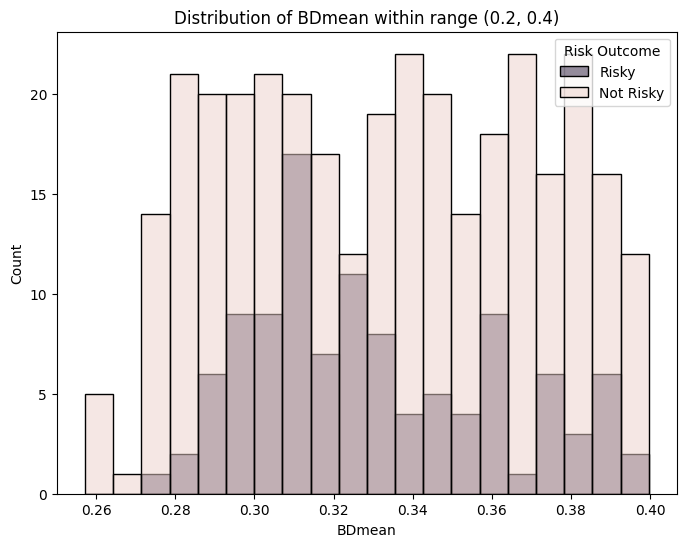

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define ranges for each risky feature
feature_ranges = {
    'hr': (60, 80),  # Example range for 'hr'
    'BDmean': (0.2, 0.4),  # Example range for 'BDmean'
    # 'UpperAlphaParietal': (0, 0.15)  # Example range for 'UpperAlphaParietal'
}

# Plot histograms for each risky feature within its respective range
for feature, (min_value, max_value) in feature_ranges.items():
    # Filter the DataFrame for the specified range of the current feature
    filtered_df = df[(df[feature] >= min_value) & (df[feature] <= max_value)]

    # Plot histogram for the current feature
    plt.figure(figsize=(8, 6))
    sns.histplot(data=filtered_df, x=feature, hue='risk_outcome', bins=20, kde=False)
    plt.title(f'Distribution of {feature} within range ({min_value}, {max_value})')
    plt.xlabel(feature)
    plt.ylabel('Count')

    # Add legend with custom labels
    plt.legend(labels=['Risky', 'Not Risky'], title='Risk Outcome', loc='upper right')
    plt.show()


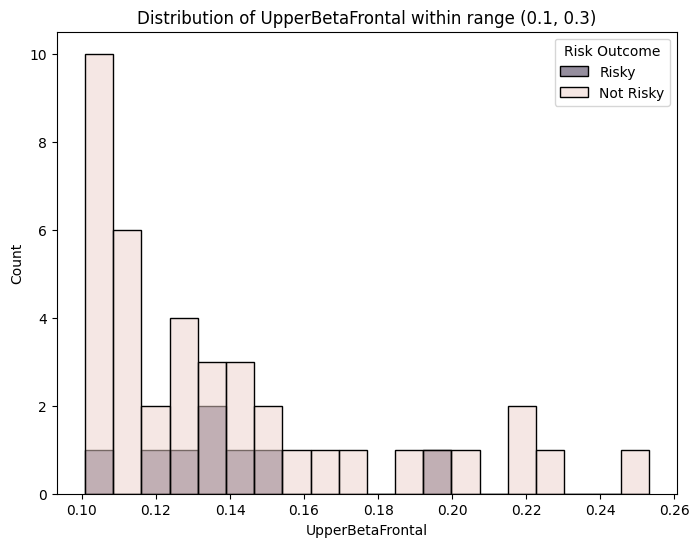

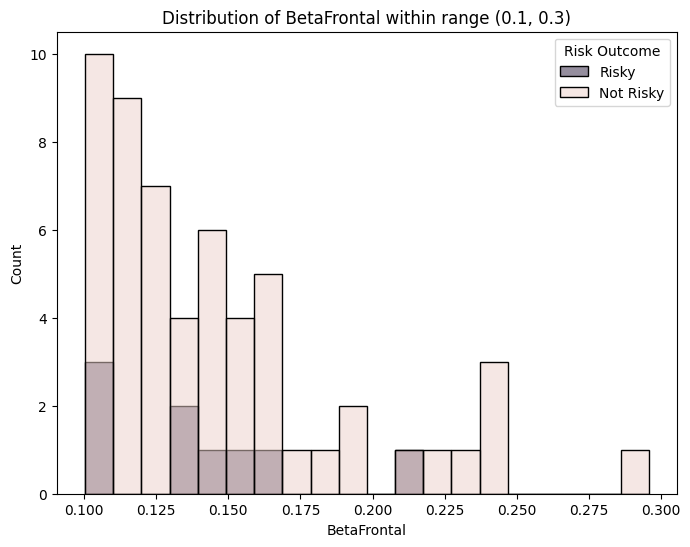

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define ranges for each non-risky feature
non_risky_feature_ranges = {
    'UpperBetaFrontal': (0.1, 0.3),  # Example range for 'UpperBetaFrontal'
    # 'hrv_lf': (0, 100),           # Example range for 'hrv_lf'
    'BetaFrontal': (0.1, 0.3)        # Example range for 'BetaFrontal'
}

# Plot histograms for each non-risky feature within its respective range
for feature, (min_value, max_value) in non_risky_feature_ranges.items():
    # Filter the DataFrame for the specified range of the current feature
    filtered_df = df[(df[feature] >= min_value) & (df[feature] <= max_value)]

    # Plot histogram for the current feature
    plt.figure(figsize=(8, 6))
    sns.histplot(data=filtered_df, x=feature, hue='risk_outcome', bins=20, kde=False)
    plt.title(f'Distribution of {feature} within range ({min_value}, {max_value})')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(labels=['Risky', 'Not Risky'], title='Risk Outcome', loc='upper right')
    plt.show()
